In [13]:
import numpy as np
import pandas as pd
from scipy import signal
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

In [ ]:
Fs = 25600.0
N = 128000
n_overlap = int(N*0.75)

# ограничьте полосу как нужно
fmax = 200.0

In [27]:
def draw(data):
    x = np.array(data).reshape(-1)
    # x — ваш сигнал (1D numpy array), длительность записи 30–60 c
    # Рекомендуется убрать DC:
    x = signal.detrend(x, type='constant')

    f, Pxx = signal.welch(
        x,
        fs=Fs,
        window='hann',
        nperseg=N,
        noverlap=n_overlap,
        detrend='constant',
        scaling='density',      # PSD
        average='mean'
    )

    # dB/Hz
    Pxx_dB = 10*np.log10(Pxx + np.finfo(float).eps)

    # Рисунок
    mask = (f >= 0) & (f <= fmax)

    plt.figure(figsize=(10,5))

    plt.plot(f[mask], Pxx_dB[mask])
    plt.xlabel('Частота, Гц'); plt.ylabel('Плотность мощности, дБ/Гц')
    plt.ylim(-75, 0)  # Ограничиваем диапазон по Y
    plt.title(f'Спектр (Welch, Hann, N={N}, overlap={int(0.75*100)}%, Δf≈{Fs/N:.3f} Гц)')
    plt.grid(True); plt.tight_layout(); plt.show()

In [ ]:
def drawAnother(data):
    x = np.array(data).reshape(-1)
    #N = len(data)

    if len(x) < N:
        raise ValueError(f"Нужно ≥ {N} отсчётов для Δf≈0.2 Гц.")

    xw = np.hanning(N) * (x[:N] - np.mean(x[:N]))  # Hann + удаление DC

    # Односторонний спектр
    X = np.fft.rfft(xw, n=N)
    f = np.fft.rfftfreq(N, d=1/Fs)

    # Нормировки:
    # - амплитуда «на линию» с поправкой на окно (коэффициент coherent gain CG≈0.5 для Hann)
    CG = np.sum(np.hanning(N))/N                      # точный coherent gain
    A = (2.0/ (N * CG)) * np.abs(X)                   # 2× — односторонний
    A[0] = A[0]/2.0                                   # DC не удваиваем

    # Отрисовка амплитуды (линейная шкала) или в дБ (20*log10)
    mask = (f >= 0) & (f <= fmax)

    plt.figure(figsize=(10,5))
    plt.plot(f[mask], 20*np.log10(A[mask] + 1e-15))
    plt.ylim(-75, 0)  # Ограничиваем диапазон по Y
    plt.xlabel('Частота, Гц'); plt.ylabel('Амплитуда, дБ (отн.)')
    plt.title(f'Амплитудный спектр rFFT (Hann, N={N}, Δf≈{Fs/N:.3f} Гц)')
    plt.grid(True);
    plt.tight_layout();
    plt.show()


In [29]:
def drawMy(data):
    n = len(data)

    yf = np.abs(fft(data.values)[0:n//2])
    xf = fftfreq(n, 1/Fs)[:n//2]  # Берем только положительные частоты

    # Амплитудный спектр (нормированный)
    amplitude_spectrum_db = 20 * np.log10((2.0/n) * yf)

    mask = (xf >= 0) & (xf <= fmax)

    # Строим график по амплитудам
    plt.figure(figsize=(10,5))
    plt.plot(xf[mask], amplitude_spectrum_db[mask])
    plt.ylim(-75, 0)  # Ограничиваем диапазон по Y
    plt.xlabel('Частота (Гц)')
    plt.grid(True);
    plt.tight_layout();
    plt.show()

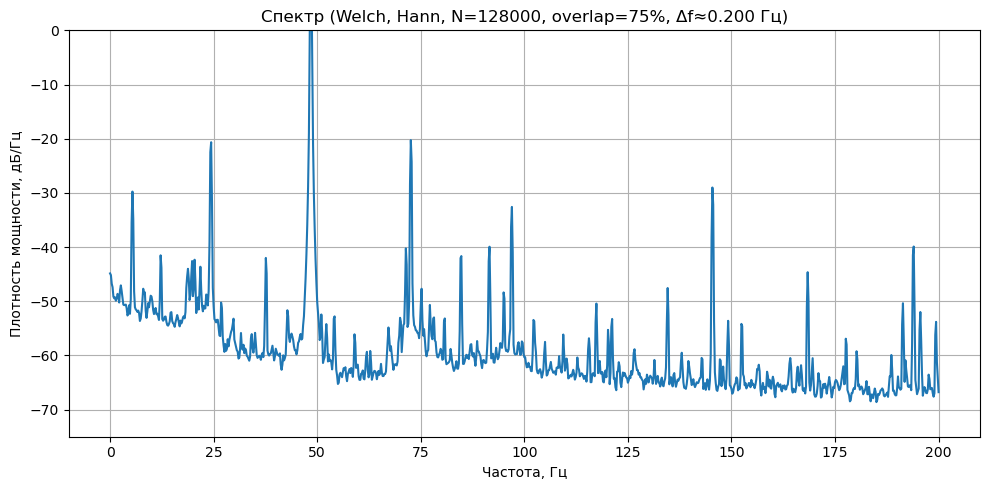

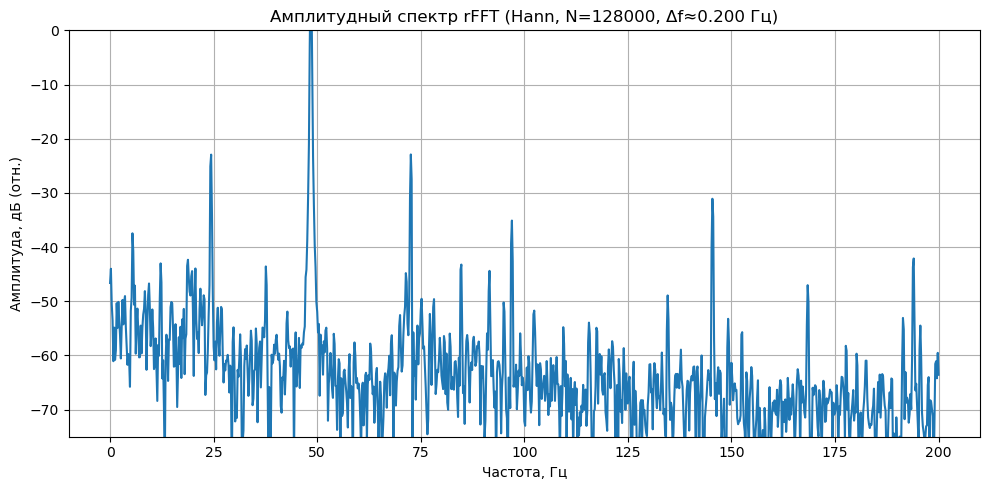

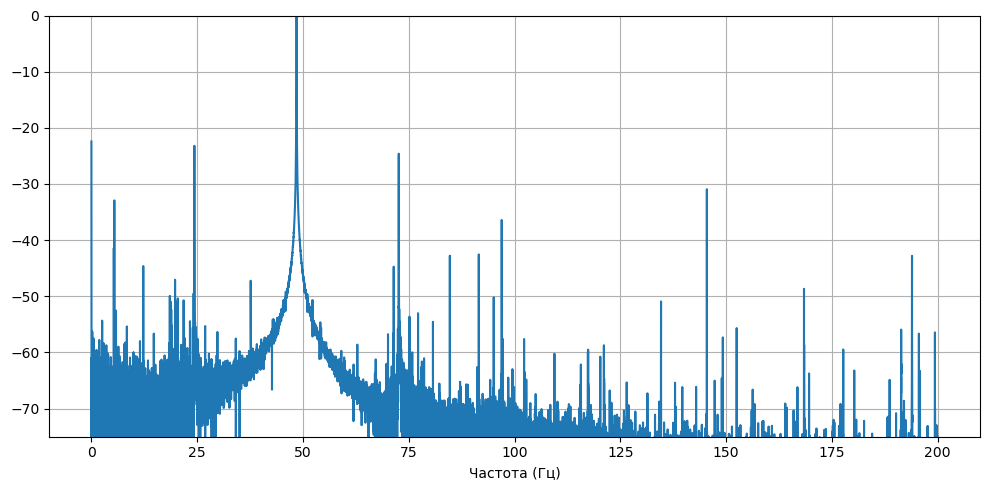

In [30]:
toc_df = pd.read_csv("current_10.csv")

draw(toc_df['current_R'])
drawAnother(toc_df['current_R'])
drawMy(toc_df['current_R'])

In [10]:
df1 = pd.read_csv("mcsadc-motor-rotorbarfailure-1_2023/ccs110.csv")
df2 = pd.read_csv("mcsadc-motor-rotorbarfailure-1_2023/ccs30.csv")
df3 = pd.read_csv("mcsadc-motor-rotorbarfailure-1_2023/ccs50.csv")

#low v
#1
df4 = pd.read_csv("mcsadc-motor-rotorbarfailure-1_2023/ccs63.csv")
#2
df5 = pd.read_csv("mcsadc-motor-rotorbarfailure-1_2023/ccs123.csv")

#med v
#1
df6 = pd.read_csv("mcsadc-motor-rotorbarfailure-1_2023/ccs88.csv")
#2
df7 = pd.read_csv("mcsadc-motor-rotorbarfailure-1_2023/ccs145.csv")

#high v
#1
df8 = pd.read_csv("mcsadc-motor-rotorbarfailure-1_2023/ccs110.csv")
#2
df9 = pd.read_csv("mcsadc-motor-rotorbarfailure-1_2023/ccs166.csv")

df_lst = [df1,df2,df3,df4,df5,df6,df7,df8,df9]

FileNotFoundError: [Errno 2] No such file or directory: 'mcsadc-motor-rotorbarfailure-1_2023/ccs110.csv'

In [15]:
for df in df_lst:
    df.columns = ['time', 'isa', 'isb', 'isc', 'vsa', 'vsb', 'vsc', 'v', 'meh']

In [16]:
for df in df_lst:
    df.drop(columns=['time', 'vsa', 'vsb', 'vsc', 'v', 'meh'], inplace=True)

In [9]:
for df in df_lst:
    draw(df)

NameError: name 'df_lst' is not defined

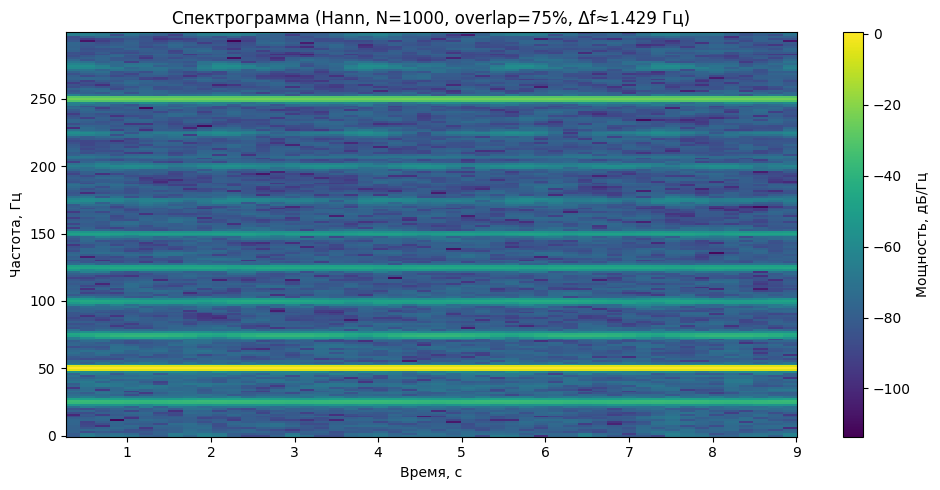

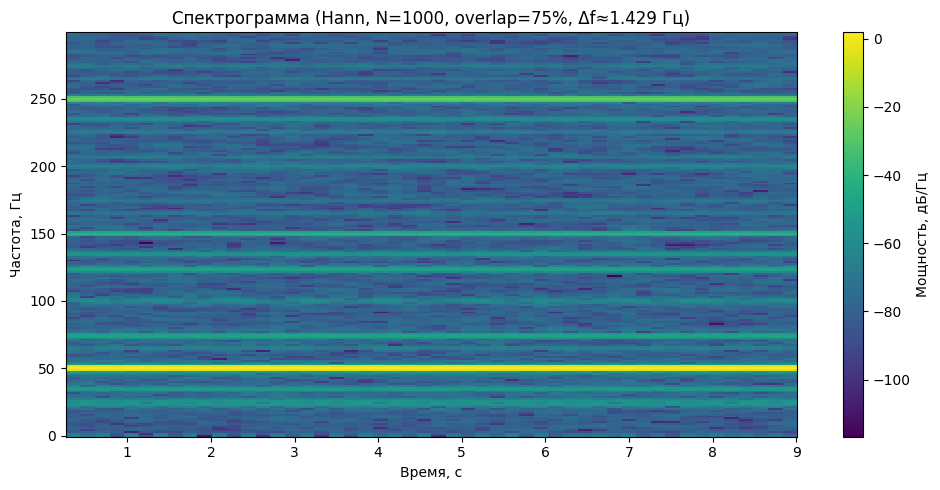

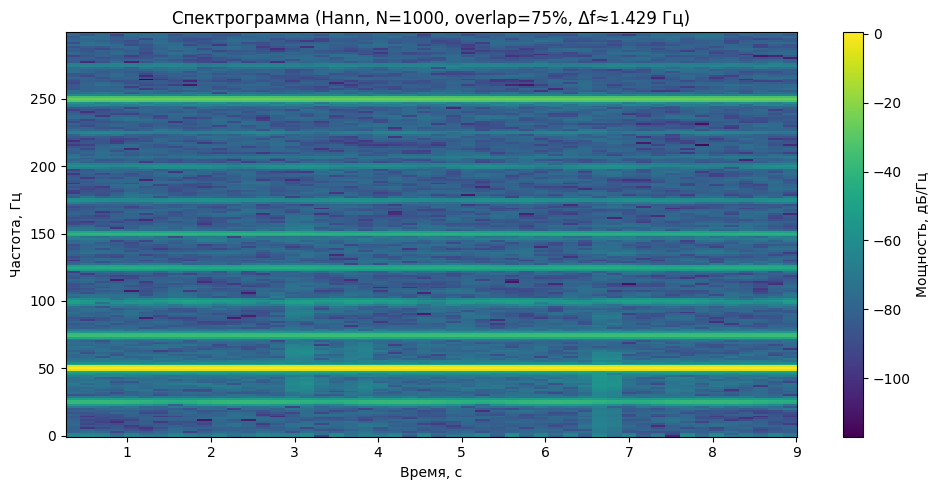

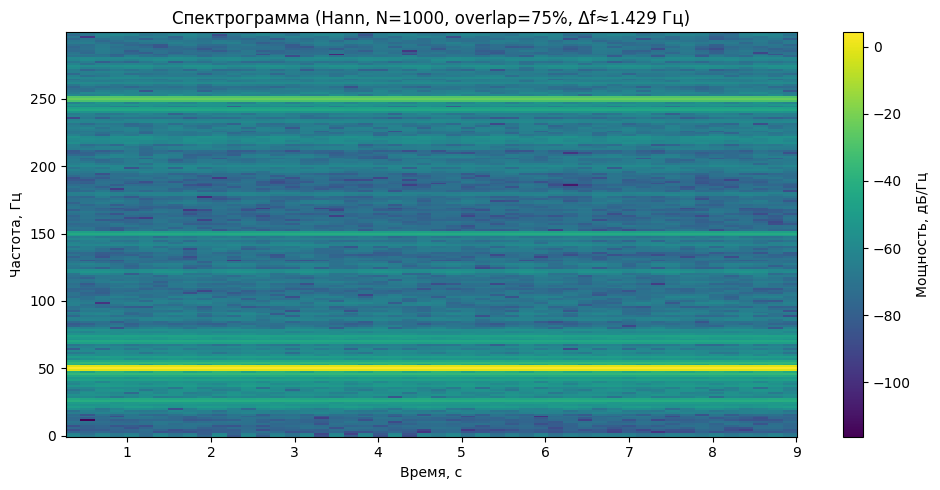

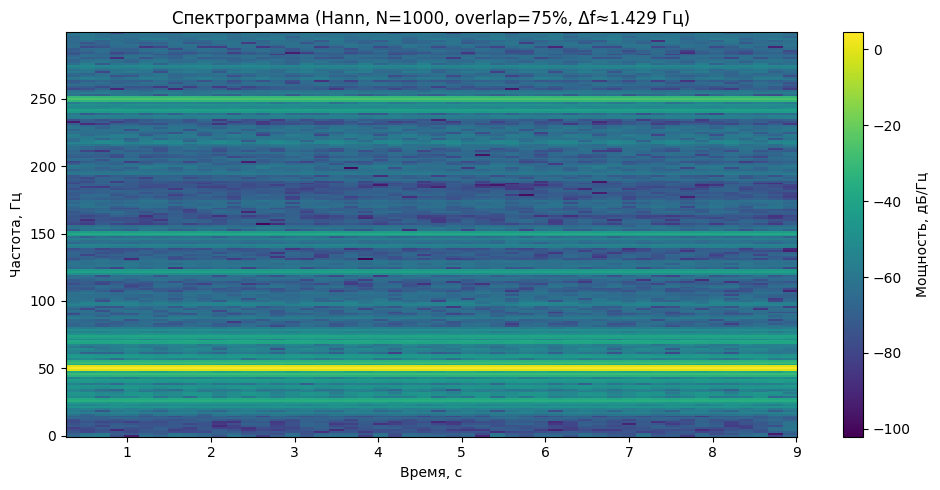

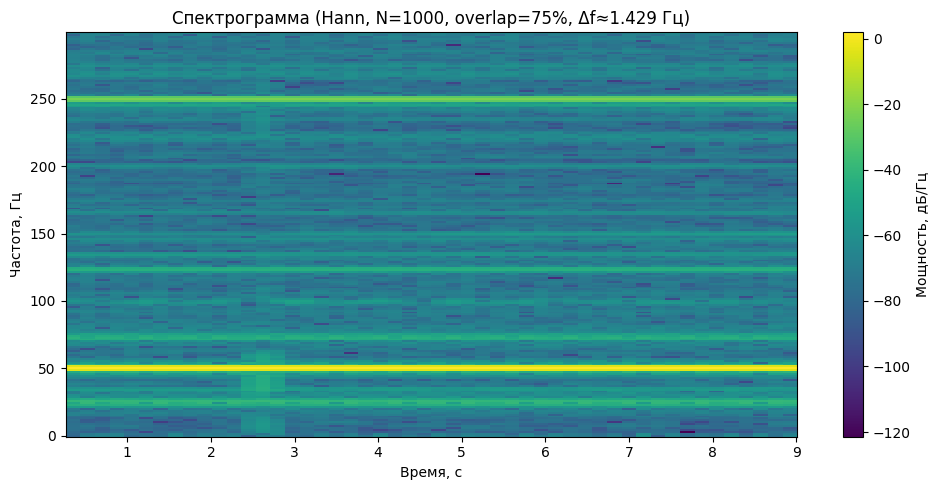

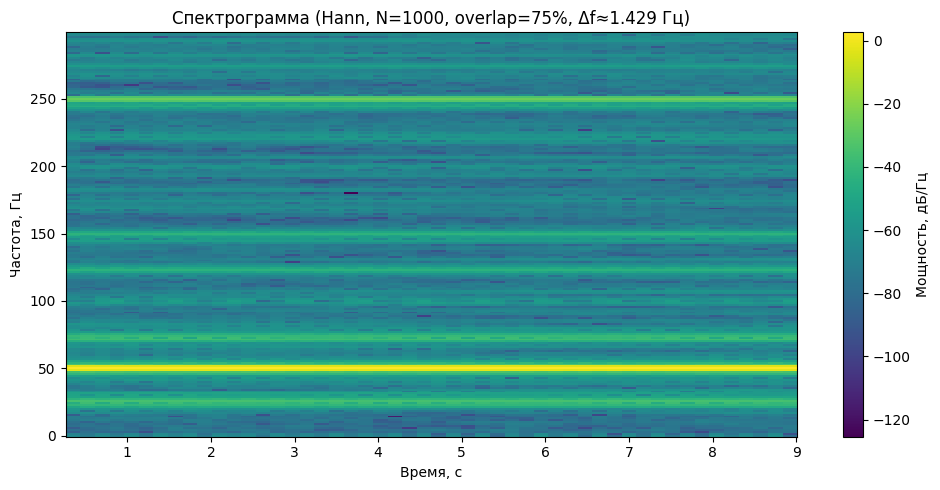

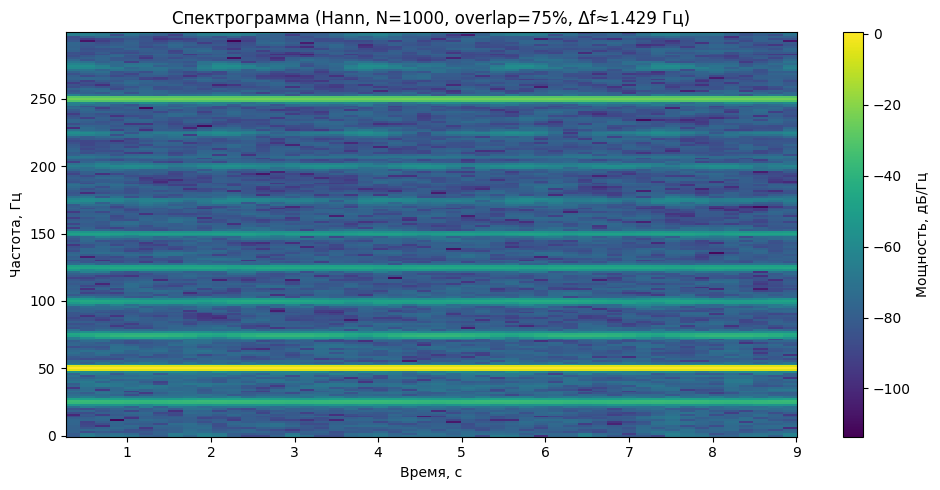

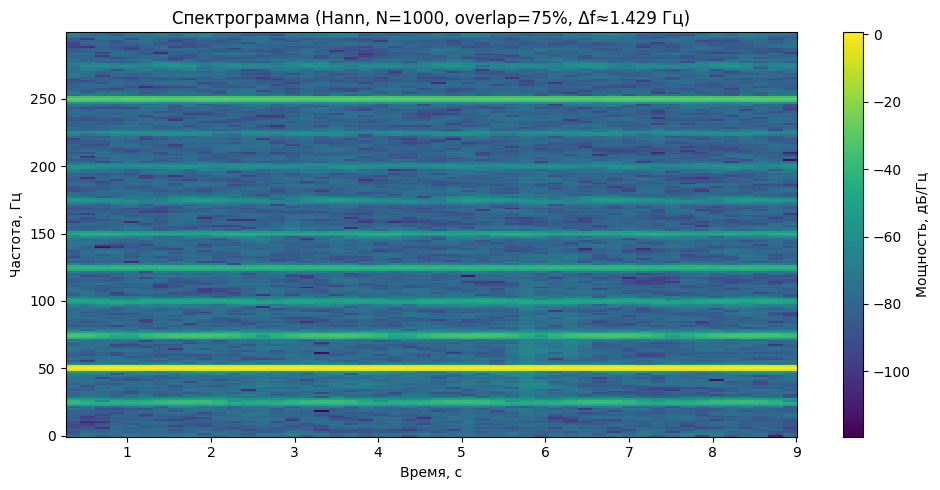

In [22]:
Fs = 1428.6
N = 1000
n_overlap = int(N*0.75)


for df in df_lst:
    

    x = np.array([df["isa"]]).reshape(-1)
# x — ваш сигнал (1D numpy array), длительность записи 30–60 c
# Рекомендуется убрать DC:
    x = signal.detrend(x, type='constant')

    f, t, Sxx = signal.spectrogram(
        x,
        fs=Fs,
        window='hann',
        nperseg=N,
        noverlap=n_overlap,
        detrend='constant',
        scaling='density',
        mode='psd'   # можно 'magnitude' для амплитуд
    )


    # Амплитудный спектр оценки (по желанию):
    # A = np.sqrt(Pxx * (f[1]-f[0]))  # гр убо в "В/√Hz" → "В", если интегрировать по бину
    Sxx_dB = 10*np.log10(Sxx + np.finfo(float).eps)


    if Sxx_dB.shape[0] != len(f) and Sxx_dB.shape[1] == len(f):
        Sxx_dB = Sxx_dB.T

    plt.figure(figsize=(10, 5))
    # ограничьте полосу, если нужно (например, до 200 Гц или вашу область интереса)
    fmax = 300.0
    f_mask = (f <= fmax)

    plt.pcolormesh(t, f[f_mask], Sxx_dB[f_mask, :], shading='auto')
    plt.ylabel('Частота, Гц')
    plt.xlabel('Время, с')
    cbar = plt.colorbar()
    cbar.set_label('Мощность, дБ/Гц')

    plt.title(f'Спектрограмма (Hann, N={N}, overlap={int(0.75*100)}%, Δf≈{Fs/N:.3f} Гц)')
    plt.tight_layout()
    plt.show()